In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [3]:
img = cv2.imread('C:\\Users\\TUF Dash F15\\Desktop\\cvCourse\\images\\giraffes.jpg')

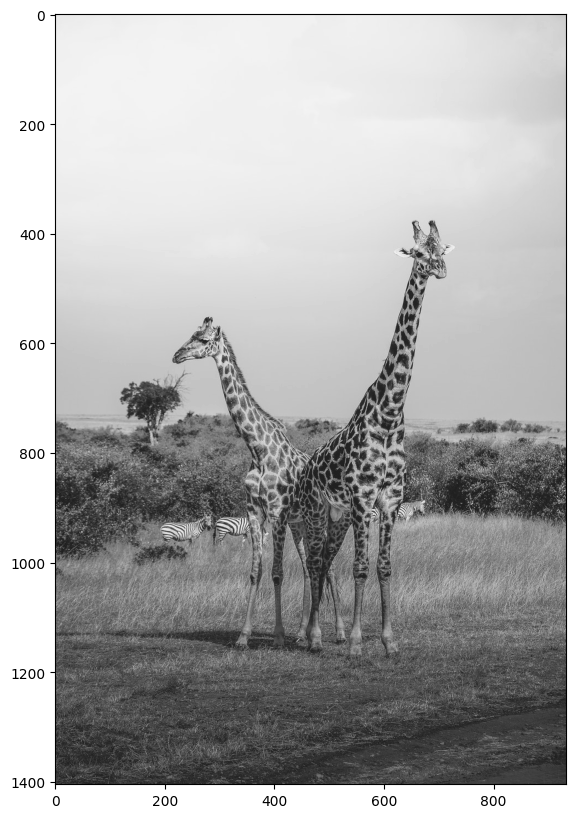

In [4]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display_img(gray_img)

In [5]:
ret , thresh1 =cv2.threshold(gray_img,127,255,cv2.THRESH_BINARY)

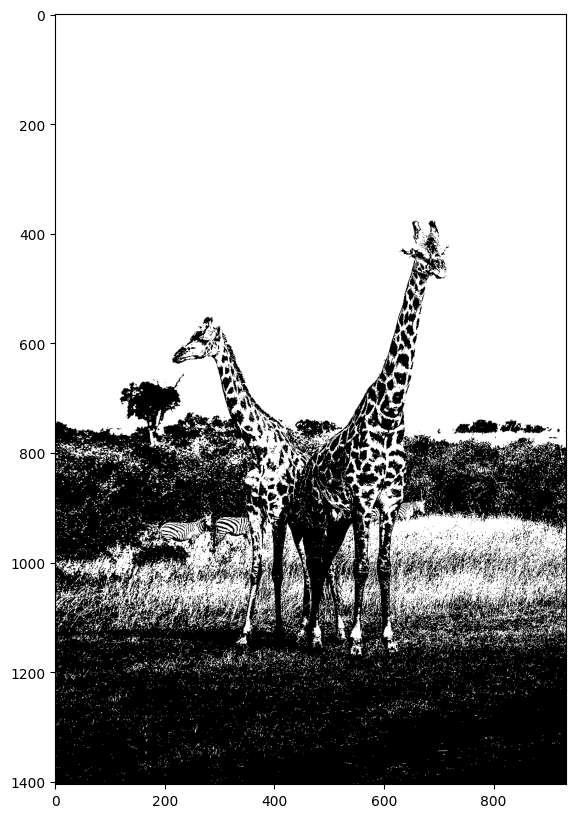

In [6]:
display_img(thresh1)

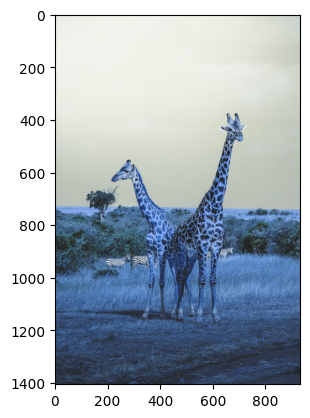

In [7]:
img = cv2.imread('C:\\Users\\TUF Dash F15\\Desktop\\cvCourse\\images\\giraffes.jpg')
plt.imshow(img)

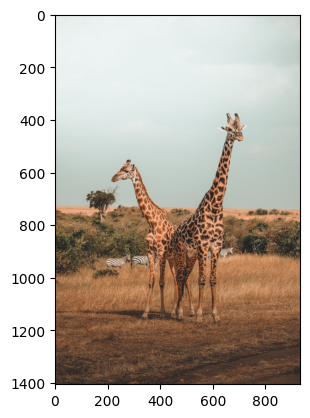

In [8]:
rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

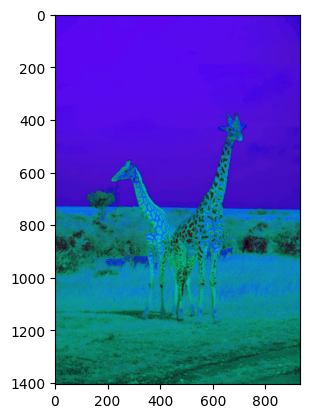

In [9]:
hsv= cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

In [19]:
kernel = np.ones((4,4),np.float32) # ya da direkt / 10 yaparız
kernel

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)

In [20]:
kernel = kernel *0.1 
kernel

array([[0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1]], dtype=float32)

Bu tür çekirdekler, istenen etkiyi elde etmek için (görüntünün bulanıklaştırılması veya keskinleştirilmesi gibi) görüntünün her pikseli üzerinde matematiksel işlemler gerçekleştirmek için kullanılabilir. Peki neden bir görüntüyü bulanıklaştırmak istiyorsunuz? Bunun iki önemli nedeni var: Görüntüdeki belirli gürültü türlerini azalttığı için. Bu nedenle bulanıklaştırmaya genellikle yumuşatma adı verilir. Dikkat dağıtıcı bir arka planı kaldırmak için, mobil cihaz kameralarında 'Portre' modunda yapıldığı gibi görüntünün bazı kısımlarını kasıtlı olarak bulanıklaştırabilirsiniz. Görüntü İşleme alanında temel bir işleme tekniği olan görüntülerin çekirdeklerle filtrelenmesinin daha birçok uygulaması vardır.

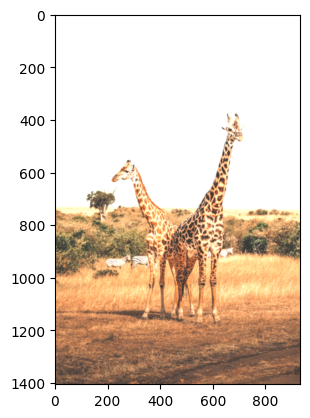

In [21]:
identity = cv2.filter2D(src=rgb, ddepth=-1, kernel=kernel) # filter2D: 2 boyutlu filtreleme şu işe yarar: 2 boyutlu bir kernel ile görüntüyü filtreler.ddepth = -1 ise görüntü ile aynı derinlikte olur. 
plt.imshow(identity)
 

In [22]:
gray_identity = cv2.cvtColor(identity,cv2.COLOR_BGR2GRAY)

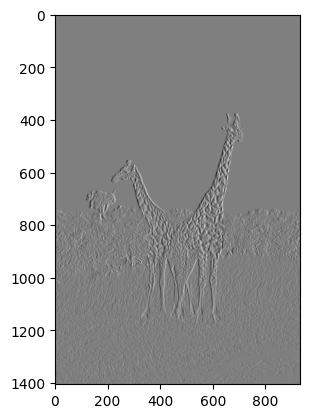

In [25]:
sobelx = cv2.Sobel(gray_identity,cv2.CV_64F,1,0,ksize=5)
plt.imshow(sobelx ,cmap='gray')  

Text(0.5, 1.0, 'zürafa histogram')

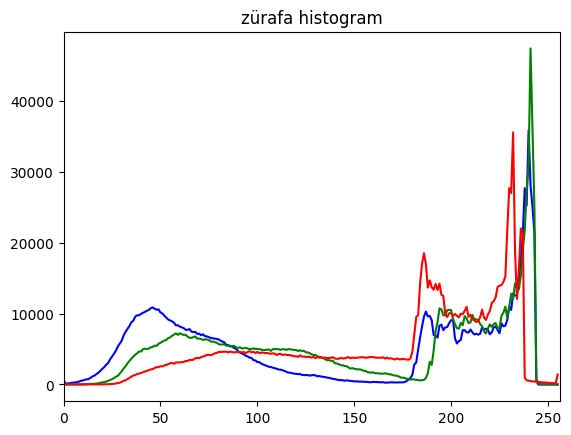

In [18]:
color = ('b', 'g', 'r') # renklerin histogramı için liste oluşturduk 

for i, col in enumerate(color): # enumerate = index ve değer döndürür (0, 'b') (1, 'g') (2, 'r') gibi
    hist = cv2.calcHist([img], channels=[i], mask=None, histSize=[256], ranges=[0,256])
    plt.plot(hist, color=col) # renklerin histogramını çizdirdik
    plt.xlim([0,256]) # x eksenini 0-256 arasında sınırladık

plt.title('zürafa histogram') # başlık